<a href="https://colab.research.google.com/github/kram254/Optimized-Machine-Learning-Based-Cyber-Attack-Detection-Model/blob/Milestone-3/cybersec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

**<center><bold>Optimized Machine Learning-Based Cyber-Attack Detection Model for Enhanced Cybersecurity in Web-Based Systems</bold></center>**


**<bold> Optimized Machine Learning-Based Cyber-Attack Detection Model to bolster cybersecurity in web-based systems. The trip will be guided along the way of data preprocessing, exploratory analysis, and model selection and finally reach the design of powerful algorithms, which have the ability to detect and categorize cyber threats. Using the LSTM, RNN and DNN architectures, we are planning to significantly improve the detection of cyber-attack accuracy and efficiency in order to entrench the digital strongholds that shield sensitive internet data.
 </bold>**

**<center><bold>Milestone 1</bold></center>**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
file_paths = [
    '/content/drive/MyDrive/data/Friday-WorkingHours-Afternoon.csv',
    '/content/drive/MyDrive/data/Friday-WorkingHours-Afternoon-P.csv',
    '/content/drive/MyDrive/data/Friday-WorkingHours-Morning.csv',
    '/content/drive/MyDrive/data/Monday-WorkingHours.csv',
    '/content/drive/MyDrive/data/Thursday-WorkingHours-Afternoon.csv',
    '/content/drive/MyDrive/data/Thursday-WorkingHours-Morning.csv',
    '/content/drive/MyDrive/data/Tuesday-WorkingHours.csv',
    '/content/drive/MyDrive/data/Wednesday-workingHours.csv',

]

dataframes = [pd.read_csv(f) for f in file_paths]
dataset = pd.concat(dataframes, ignore_index=True)

dataset1= pd.read_csv("/content/drive/MyDrive/data/Friday-WorkingHours-Afternoon.csv")

for i, dataset in enumerate(dataframes):
    print(f"Dataset {i+1} - Shape: {dataset.shape}")
    display(dataset.head())


Dataset 1 - Shape: (225745, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 2 - Shape: (286467, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,0,0,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,0,0,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,0,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,0,0,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 3 - Shape: (191033, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,72,72,72.0,0.0,67.411331,0.425756,2.398738e+06,5.798698e+06,16400000,3,113000000,3.636796e+06,6.848761e+06,16400000,3,113000000,7516023.200,8323384.915,16400000,3,1,0,0,0,1024,512,0.283837,0.141919,0,403,163.326531,178.931713,32016.55782,0,1,0,0,1,0,0,0,0,166.729167,201.5,72.0,1024,0,0,0,0,0,0,32,6448,16,1152,377,2079,15,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,316,316,316.0,0.0,102.039585,0.425756,2.398735e+06,5.798710e+06,16400000,2,113000000,3.636792e+06,6.848777e+06,16400000,2,113000000,7516016.133,8323376.147,16400000,4,1,0,0,0,1024,512,0.283838,0.141919,0,403,243.000000,174.716914,30526.00000,0,1,0,0,1,0,0,0,0,248.062500,201.5,316.0,1024,0,0,0,0,0,0,32,6448,16,5056,955,2079,15,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.000000,4.790898,2.091128e+05,1.395543e+06,20800000,0,114000000,2.091128e+05,1.395543e+06,20800000,0,0,0.000,0.000,0,0,0,0,0,0,0,0,4.790898,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0,0,0,0,0,0,0,545,0,0,0,-1,-1,0,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,0,0,0.0,0.0,6152.248167,219.723149,4.767905e+03,2.183302e+04,100055,1,100126,4.767905e+03,2.183302e+04,100055,1,0,0.000,0.000,0,0,0,0,0,0,704,0,219.723149,0.000000,28,28,28.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,29.272727,28.0,0.0,704,0,0,0,0,0,0,22,616,0,0,-1,-1,21,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,0,0,0.0,0.0,0.000000,73.046019,1.825333e+04,3.046984e+04,53431,108,54760,1.825333e+04,3.046984e+04,53431,108,0,0.000,0.000,0,0,0,0,0,0,0,0,73.046019,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0,0,0,0,0,0,0,4,0,0,0,-1,-1,0,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


Dataset 4 - Shape: (529918, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3000000.0,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000.0,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 5 - Shape: (288602, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,166,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,12048.192770,166.0000,0.000000e+00,166,166,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,6024.096386,6024.096386,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,1,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
1,60148,83,1,2,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,36144.578310,41.5000,1.060660e+01,49,34,0,0.0000,0.000,0,0,49,49.0,0.0,49,49,0,0,0,0,32,64,12048.192770,24096.385540,0,0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,2,0.0,0.0,0.0,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
2,123,99947,1,1,48,48,48,48,48.0,0.0,48,48,48.0,0.0,960.509070,20.010606,99947.0000,0.000000e+00,99947,99947,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,40,40,10.005303,10.005303,48,48,48.0,0.0,0.0,0,0,0,0,0,0,0,0,1,72.0,48.0,48.0,40,0,0,0,0,0,0,1,48,1,48,-1,-1,0,40,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
3,123,37017,1,1,48,48,48,48,48.0,0.0,48,48,48.0,0.0,2593.403031,54.029230,37017.0000,0.000000e+00,37017,37017,0,0.0000,0.000,0,0,0,0.0,0.0,0,0,0,0,0,0,32,32,27.014615,27.014615,48,48,48.0,0.0,0.0,0,0,0,0,0,0,0,0,1,72.0,48.0,48.0,32,0,0,0,0,0,0,1,48,1,48,-1,-1,0,32,0.000,0.000,0,0,0.0,0.000,0,0,BENIGN
4,0,111161336,147,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,1.322402,761379.0137,2.539814e+06,13600000,0,111000000,761379.0137,2539814.273,13600000,0,0,0.0,0.0,0,0,0,0,0,0,0,0,1.322402,0.000000,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,147,0,0,0,-1,-1,0,0,1753752.625,2123197.578,4822992,95,9463032.7,2657727.996,13600000,5700287,BENIGN


Dataset 6 - Shape: (170366, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,923,316,417.166667,231.080951,1.740123e+02,0.636630,1.592894e+06,4.597265e+06,16500000,3,113000000,2.406286e+06,5.491986e+06,16500000,3,113000000,4917177.522,7.084368e+06,16500000,3,1,0,0,0,1536,768,0.424420,0.212210,0,923,275.109589,233.833248,54677.98782,0,1,0,0,1,0,0,0,0,278.930556,201.416667,417.166667,1536,0,0,0,0,0,0,48,9668,24,10012,571,2079,23,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,1139,126,317.950000,208.261294,2.122254e+02,0.951762,1.060502e+06,3.813685e+06,16500000,2,113000000,1.693637e+06,4.719143e+06,16500000,2,113000000,2908399.744,5.922355e+06,16500000,3,1,0,0,0,2176,1280,0.599258,0.352505,0,1139,224.633027,198.999612,39600.84557,0,1,0,0,1,0,0,0,0,226.712963,167.117647,317.950000,2176,0,0,0,0,0,0,68,11364,40,12718,390,2081,39,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.250568,8.050035e+05,5.277837e+06,60100000,0,120000000,8.050035e+05,5.277837e+06,60100000,0,0,0.000,0.000000e+00,0,0,0,0,0,0,0,0,1.250568,0.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,150,0,0,0,-1,-1,0,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,1460,0,603.000000,653.594166,1.087088e+02,0.265508,4.017462e+06,1.550000e+07,60000000,1,60300000,7.532741e+06,2.120000e+07,60000000,311,211947,35324.500,2.750433e+04,57109,48,0,0,0,0,192,152,0.149348,0.116160,0,1460,385.352941,532.094087,283124.11760,0,0,0,1,0,0,0,0,0,409.437500,258.888889,603.000000,192,0,0,0,0,0,0,9,2330,7,4221,8192,513,8,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,161,161,161.000000,0.000000,1.576208e+06,14869.888480,8.966667e+01,1.483790e+02,261,4,4,4.000000e+00,0.000000e+00,4,4,4,4.000,0.000000e+00,4,4,0,0,0,0,64,64,7434.944238,7434.944238,51,161,95.000000,60.249481,3630.00000,0,0,0,0,0,0,0,0,1,118.750000,51.000000,161.000000,64,0,0,0,0,0,0,2,102,2,322,-1,-1,1,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


Dataset 7 - Shape: (445909, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,179,0,89.5,103.345698,1246875.000,17187.500000,64.000000,135.557286,445,1,640,106.666667,194.325157,497,1,538,179.333333,303.686242,530,4,0,0,0,0,164,104,10937.500000,6250.000000,0,220,66.500000,99.001837,9801.363636,0,0,0,1,0,0,0,0,0,72.545455,62.857143,89.5,164,0,0,0,0,0,0,7,440,4,358,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,1472,0,736.0,849.859596,3937777.778,14444.444440,75.000000,192.795228,684,1,900,112.500000,252.411229,734,1,766,255.333333,435.323252,758,3,0,0,0,0,204,104,10000.000000,4444.444444,0,1472,253.142857,527.434262,278186.901100,0,0,0,1,0,0,0,0,0,272.615385,66.666667,736.0,204,0,0,0,0,0,0,9,600,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,1415,0,707.5,816.950631,4652282.158,9128.630705,120.500000,236.433336,777,1,1205,200.833333,397.058392,1008,1,927,309.000000,491.647231,876,1,0,0,0,0,164,104,5809.128631,3319.502075,0,1415,467.166667,690.098917,476236.515200,0,0,0,1,0,0,0,0,0,509.636364,396.571429,707.5,164,0,0,0,0,0,0,7,2776,4,2830,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,185,0,92.5,106.809800,1608610.568,21526.418790,51.100000,90.767652,299,1,511,85.166667,131.900594,349,1,462,154.000000,224.719826,412,1,0,0,0,0,164,104,13698.630140,7827.788650,0,226,68.500000,101.933579,10390.454550,0,0,0,1,0,0,0,0,0,74.727273,64.571429,92.5,164,0,0,0,0,0,0,7,452,4,370,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,1472,0,736.0,849.859596,4600258.732,16817.593790,64.416667,148.698266,531,1,773,96.625000,196.665733,580,1,675,225.000000,348.901132,627,1,0,0,0,0,204,104,11642.949550,5174.644243,0,1472,254.000000,527.520762,278278.153800,0,0,0,1,0,0,0,0,0,273.538461,68.000000,736.0,204,0,0,0,0,0,0,9,612,4,2944,8192,2053,2,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Dataset 8 - Shape: (692703, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.132505e+02,52.208416,38308.000000,0.000000,38308,38308,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,26.104208,26.104208,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1.039666e+06,33402.922760,31.933333,25.510409,73,0,479,47.900000,38.942836,109,1,401,100.250000,101.736178,237,3,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3195.595588,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5.753425e+06,14611.872150,73.000000,204.960972,810,1,1095,121.666667,298.746130,915,1,995,199.000000,345.535092,810,3,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,451250.132400,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,3069,0,555.000000,977.480342,6.650007e+05,1907.141918,543.071429,2519.931377,13391,0,15206,950.375000,3322.417812,13391,2,15112,1373.818182,4176.449588,13961,3,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,496537.374700,0,0,0,1,0,0,0,0,0,348.689655,203.058823,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.771062e+06,13736.263740,78.000000,207.000929,794,1,1092,136.500000,313.850738,910,1,1015,203.000000,333.240154,794,3,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,496440.116700,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


**<bold> Data Processing</bold>**

In [21]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

for column in dataset.columns:
    if dataset[column].dtype == np.float64 or dataset[column].dtype == np.int64:
        dataset[column].fillna(dataset[column].mean(), inplace=True)


dataset = dataset.dropna()
dataset = dataset.drop_duplicates()
dataset.reset_index(drop=True, inplace=True)
info = dataset.info()
null_values = dataset.isnull().sum()

print("```````````````````````````````````````````````````````````")
print(null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610794 entries, 0 to 610793
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             610794 non-null  int64  
 1    Flow Duration                610794 non-null  int64  
 2    Total Fwd Packets            610794 non-null  int64  
 3    Total Backward Packets       610794 non-null  int64  
 4   Total Length of Fwd Packets   610794 non-null  int64  
 5    Total Length of Bwd Packets  610794 non-null  int64  
 6    Fwd Packet Length Max        610794 non-null  int64  
 7    Fwd Packet Length Min        610794 non-null  int64  
 8    Fwd Packet Length Mean       610794 non-null  float64
 9    Fwd Packet Length Std        610794 non-null  float64
 10  Bwd Packet Length Max         610794 non-null  int64  
 11   Bwd Packet Length Min        610794 non-null  int64  
 12   Bwd Packet Length Mean       610794 non-nul

In [22]:
def reduce_mem_usage(df):
    """
    Iterating through all the columns of a dataframe and modify the data type to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))




    return df


dataset = reduce_mem_usage(dataset)

# display(dataset.info())
display(dataset.describe())



Memory usage of dataframe is 368.14 MB
Memory usage after optimization is: 140.38 MB
Decreased by 61.9%


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,610794.000000,6.107940e+05,610794.000000,610794.000000,6.107940e+05,6.107940e+05,610794.000000,610794.000000,610794.000000,610794.000000,610794.000000,610794.000000,610794.000000,610794.000000,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,610794.000000,610794.0,610794.0,610794.0,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,610794.000000,610794.000000,610794.000000,610794.000000,6.107940e+05,610794.000000,610794.000000,610794.000000,610794.00000,610794.000000,610794.000000,610794.0,610794.000000,610794.000000,610794.000000,610794.000000,610794.000000,6.107940e+05,610794.0,610794.0,610794.0,610794.0,610794.0,610794.0,610794.000000,6.107940e+05,610794.000000,6.107940e+05,610794.000000,610794.000000,610794.000000,610794.000000,6.107940e+05,6.107940e+05,6.107940e+05,6.107940e+05,610794.0,6.107940e+05,6.107940e+05,6.107940e+05
mean,6432.111589,3.175187e+07,10.555035,11.543119,6.258788e+02,1.927276e+04,263.168694,15.398152,66.982224,93.933784,1882.822696,36.884567,624.444397,746.921814,1.612873e+06,3.612586e+04,2.833764e+06,7.761962e+06,2.595819e+07,2.477261e+05,3.146055e+07,5.744240e+06,1.022584e+07,2.585084e+07,1.164160e+06,1.572294e+07,3.001718e+06,3.995309e+06,1.055282e+07,1.050821e+06,0.043388,0.0,0.0,0.0,2.660488e+02,2.815941e+02,3.206174e+04,4.083622e+03,14.647097,1953.933501,313.785919,592.535278,1.006183e+06,0.104628,0.043388,0.000383,0.21965,0.366006,0.072953,0.0,0.000385,0.609246,344.286163,66.982224,624.444397,2.660488e+02,0.0,0.0,0.0,0.0,0.0,0.0,10.555035,6.258788e+02,11.543119,1.927100e+04,5922.396679,1673.654093,6.898530,26.326563,1.046150e+05,5.399295e+04,1.845596e+05,7.162068e+04,25075696.0,5.379891e+05,2.554127e+07,2.464759e+07
std,16603.314955,4.421601e+07,795.717376,1048.114271,6.560426e+03,2.386714e+06,636.116986,40.006374,162.724442,238.658630,2708.248808,67.099692,822.552490,1140.813354,2.880321e+07,1.818036e+05,5.859848e+06,1.222913e+07,3.990042e+07,3.879502e+06,4.424510e+07,1.157574e+07,1.667856e+07,3.995482e+07,9.419825e+06,3.510471e+07,1.016300e+07,1.135282e+07,2.762787e+07,8.625036e+06,0.203729,0.0,0.0,0.0,1.665850e+04,2.096805e+04,1.751450e+05,3.119684e+04,28.453595,2725.136896,378.436127,809.364319,1.830130e+06,0.306073,0.203729,0.019569,0.41401,0.481711,0.260059,0.0,0.019611,0.570741,407.094727,162.724442,822.552490,1.665850e+04,0.0,0.0,0.0,0.0,0.0,0.0,795.717376,6.560426e+03,1048.114271,2.386477e+06,12407.853183,7768.691011,761.595616,6.403308,7.453429e+05,5.046630e+05,1.163974e+06,6.439284e+05,39673476.0,4.776426e+06,4.002959e+07,3.965410e+07
min,0.0

**<bold>Exploratory Data Analysis (EDA)</bold>**

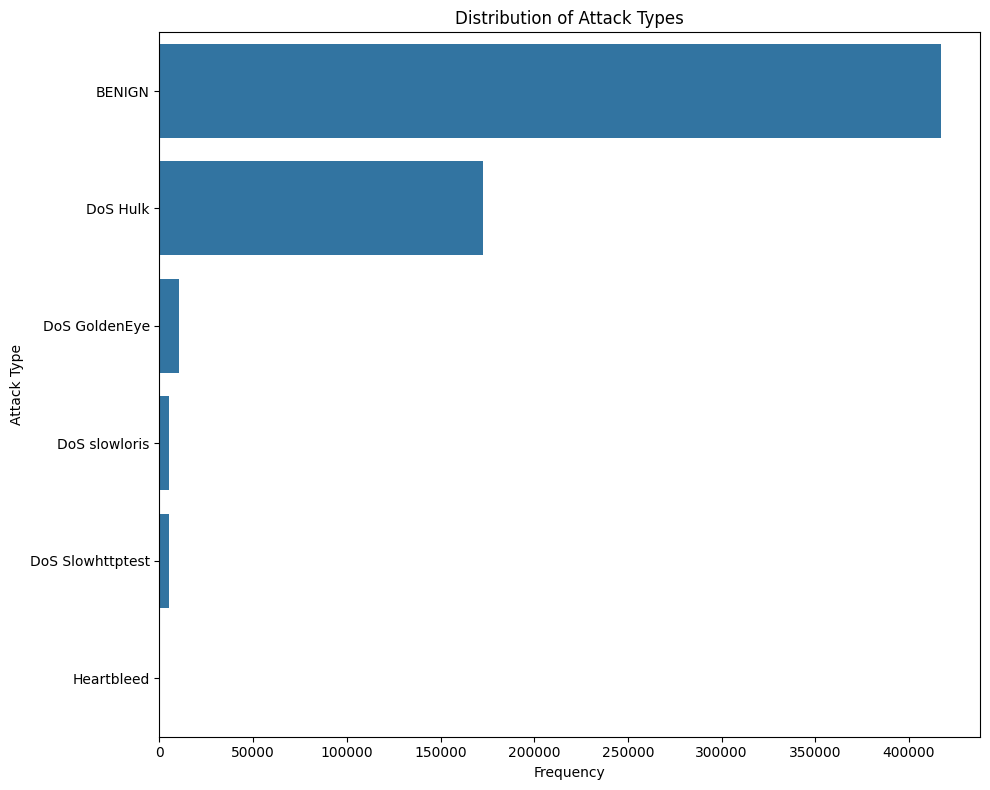

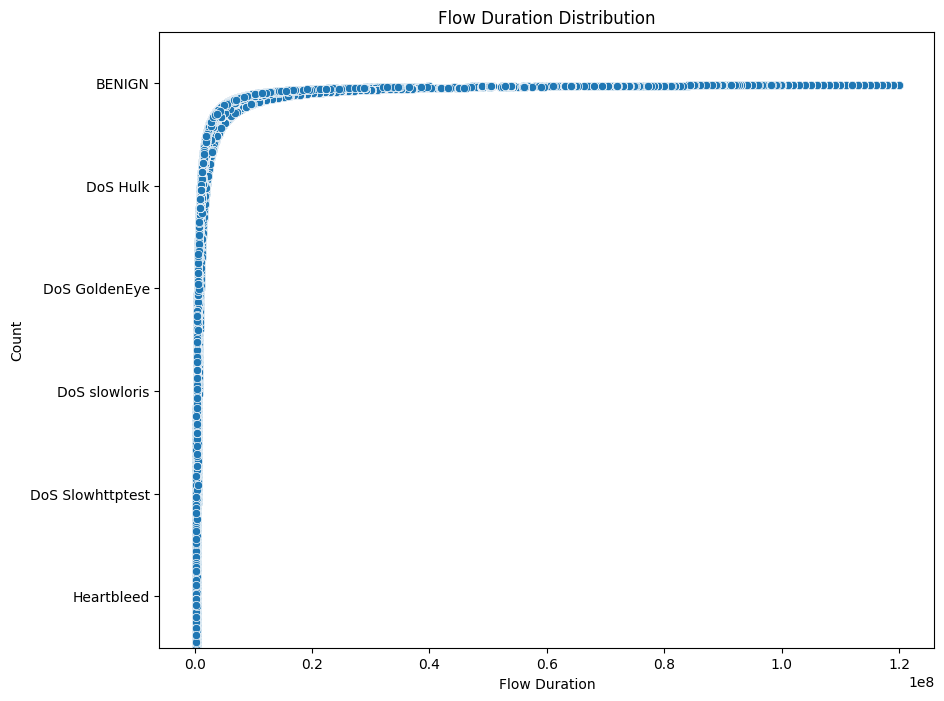

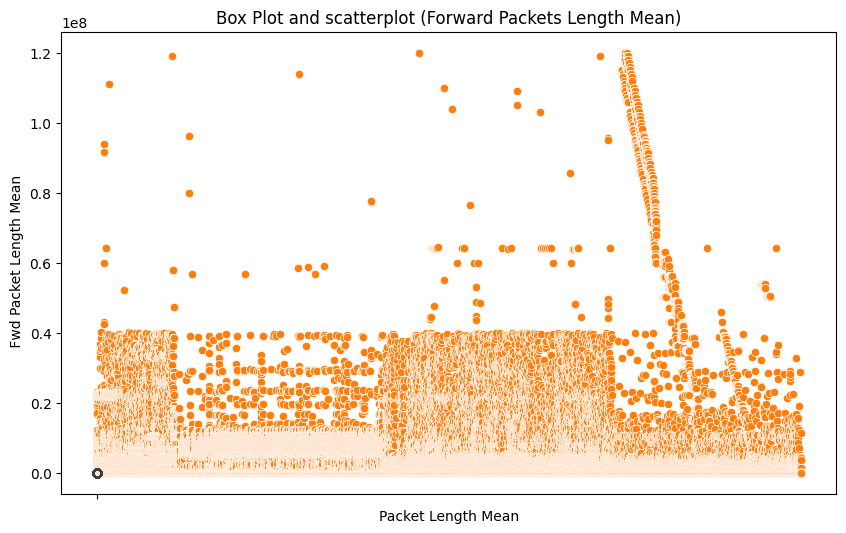

In [23]:
attack_type_column = dataset.columns[-1]
Flow_Duration = dataset.columns[2]
Total_Fwd_Packets = dataset.columns[3]
Flow_bytes = dataset.columns[15]
Flow_pkts = dataset.columns[16]
iat_mean = dataset.columns[17]
Fwd_Pkts = dataset.columns[36]
Fwd_Pkts_Length_Mean = dataset.columns[8]

plt.figure(figsize=(10, 8))
sns.countplot(y=attack_type_column, data=dataset, order=dataset[attack_type_column].value_counts().index)
plt.title('Distribution of Attack Types')
plt.xlabel('Frequency')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot (data=dataset, x=Flow_pkts, y=Flow_bytes)
# sns.scatterplot (dataset[Flow_Duration], data=dataset, x=Flow_pkts, y=Flow_bytes, bins=50)
sns.countplot(y=iat_mean, data=dataset, order=dataset[attack_type_column].value_counts().index)
plt.title('Flow Duration Distribution')
plt.xlabel('Flow Duration')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(dataset[Fwd_Pkts_Length_Mean])
sns.scatterplot(dataset[Flow_pkts])
plt.title('Box Plot and scatterplot (Forward Packets Length Mean)')
plt.xlabel('Packet Length Mean')
plt.show()


Text(0.5, 1.0, 'Feature Importance')

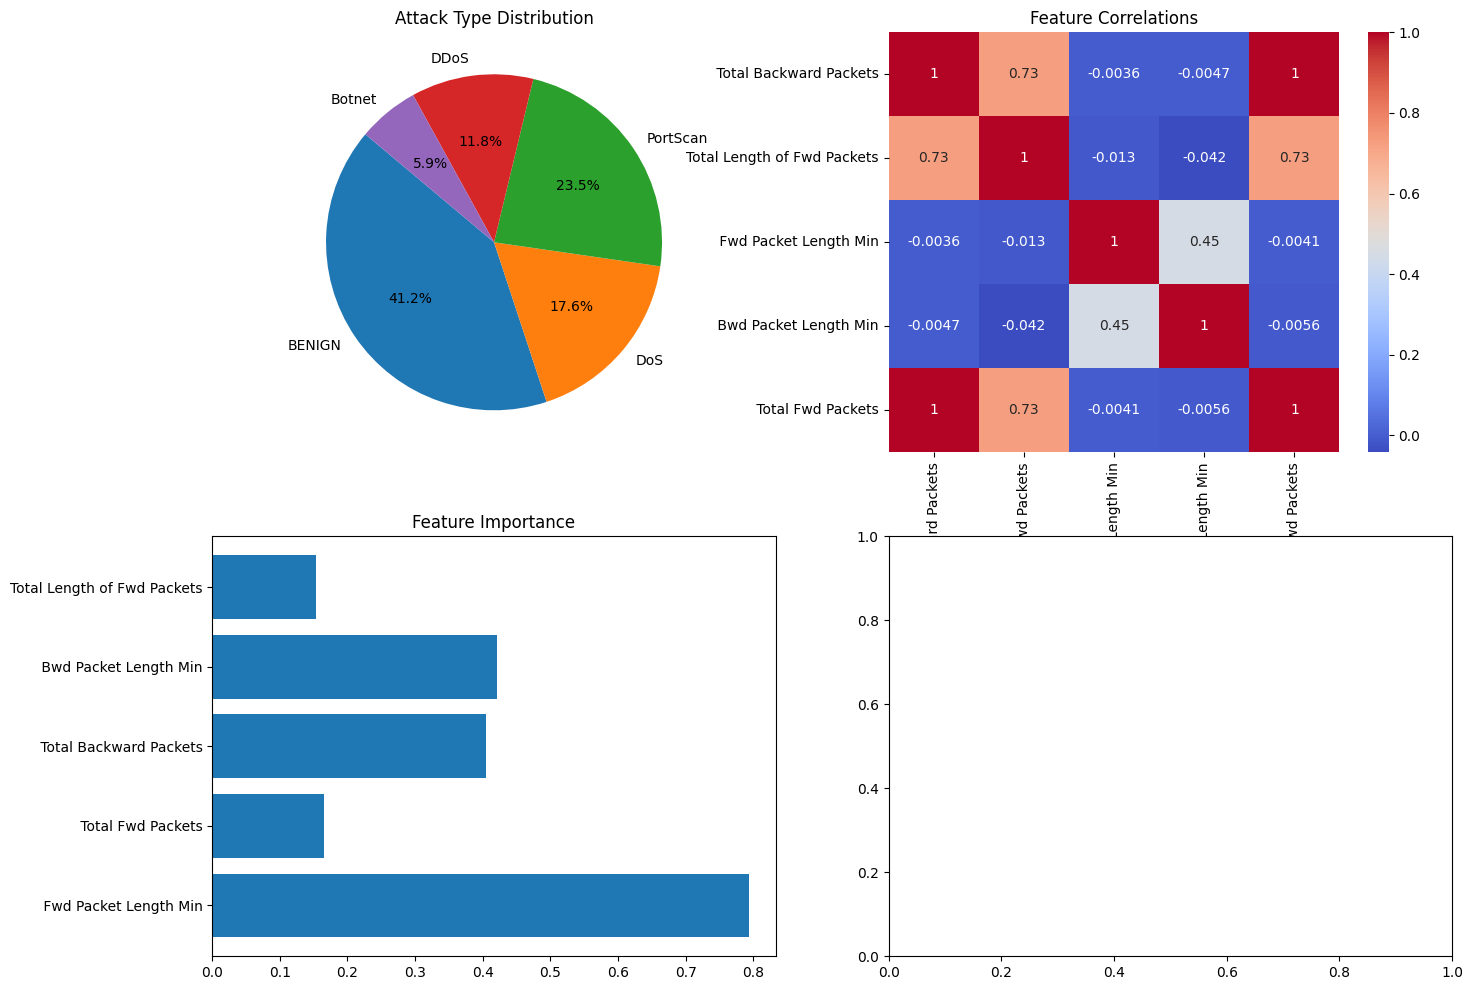

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Total_Fwd_Packets = dataset.columns[3]
Total_Bkwd_Packets = dataset.columns[4]
Fwd_Pkt_Length_Max = dataset.columns[7]
Bwd_Pkt_Length_Max = dataset.columns[11]


attack_types = ['BENIGN', 'DoS', 'PortScan', 'DDoS', 'Botnet']
attack_counts = [3500, 1500, 2000, 1000, 500]

features = [Total_Fwd_Packets, Total_Bkwd_Packets, Fwd_Pkt_Length_Max, Bwd_Pkt_Length_Max, Flow_Duration]
correlation_data = np.random.rand(5, 5)
dataset1 = pd.DataFrame(correlation_data, columns=features, index=features)
dataset_corr = dataset[features].corr()

features_importance = [Fwd_Pkt_Length_Max, Flow_Duration, Total_Fwd_Packets, Bwd_Pkt_Length_Max, Total_Bkwd_Packets]
importance_scores = np.random.rand(5)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
attack_patterns = np.random.rand(5, 4)
dataset1 = pd.DataFrame(attack_patterns, columns=attack_types[1:], index=days)

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].pie(attack_counts, labels=attack_types, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Attack Type Distribution')

sns.heatmap(dataset_corr, annot=True, cmap='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title('Feature Correlations')

axs[1, 0].barh(features_importance, importance_scores)
axs[1, 0].set_title('Feature Importance')



**<center><bold>MILESTONE 2</bold></center>**

**<p>Model Implementation: Develop initial models for LSTM (Long Short-Term Memory networks), RNN (Recurrent Neural Networks), and DNN (Deep Neural Networks) using a framework like TensorFlow or PyTorch.
Baseline Training: Train each model on the preprocessed dataset, ensuring to split the data into training, validation, and test sets.
Performance Evaluation: Evaluate the baseline models using metrics appropriate for classification, such as accuracy, precision, recall, and F1-score.</p>**

**<bold>Training</bold>.**

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import models
from keras.optimizers import Adam

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

y = pd.get_dummies(dataset.iloc[:, -1]).values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# lstm_model

lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(y_train.shape[1], activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# RNN Model
rnn_model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    SimpleRNN(50),
    Dense(y_train.shape[1], activation='softmax')
])
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#DNN Model
dnn_model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[2],)),
    Dense(50, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Training
lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)
rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)
dnn_history = dnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[2])), y_train, validation_data=(X_val.reshape((X_val.shape[0], X_val.shape[2])), y_val), epochs=10, batch_size=64)


from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                              epochs=20, batch_size=64, callbacks=[early_stopping])

Epoch 1/10
5727/5727 [==============================] - 51s 8ms/step - loss: 0.2627 - accuracy: 0.9183 - val_loss: 0.2430 - val_accuracy: 0.9320
Epoch 2/10
5727/5727 [==============================] - 48s 8ms/step - loss: 0.2146 - accuracy: 0.9318 - val_loss: 0.2039 - val_accuracy: 0.9306
Epoch 3/10
5727/5727 [==============================] - 44s 8ms/step - loss: 0.1948 - accuracy: 0.9363 - val_loss: 0.2001 - val_accuracy: 0.9392
Epoch 4/10
5727/5727 [==============================] - 45s 8ms/step - loss: 0.2008 - accuracy: 0.9349 - val_loss: 0.2038 - val_accuracy: 0.9378
Epoch 5/10
5727/5727 [==============================] - 52s 9ms/step - loss: 0.2007 - accuracy: 0.9350 - val_loss: 0.2092 - val_accuracy: 0.9371
Epoch 6/10
5727/5727 [==============================] - 45s 8ms/step - loss: 0.2021 - accuracy: 0.9367 - val_loss: 0.2044 - val_accuracy: 0.9311
Epoch 7/10
5727/5727 [==============================] - 43s 7ms/step - loss: 0.1980 - accuracy: 0.9362 - val_loss: 0.2091 - val_ac

In [37]:
# lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

# rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

# dnn_history = dnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[2])), y_train, validation_data=(X_val.reshape((X_val.shape[0], X_val.shape[2])), y_val), epochs=50, batch_size=64)


# **Evaluation**

# **Raising the model Accuracy**

In [38]:
# from keras import regularizers

# lstm_model = Sequential([
#     LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
#     LSTM(50),
#     Dense(y_train.shape[1], activation='softmax')
# ])
# lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250, batch_size=64)

# rnn_model = Sequential([
#     SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
#     SimpleRNN(50),
#     Dense(y_train.shape[1], activation='softmax')
# ])
# rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

# dnn_model = Sequential([
#     Dense(50, activation='relu', input_shape=(X_train.shape[2],)),
#     Dense(50, activation='relu'),
#     Dense(y_train.shape[1], activation='softmax')
# ])
# dnn_model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

# dnn_history = dnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[2])), y_train, validation_data=(X_val.reshape((X_val.shape[0], X_val.shape[2])), y_val), epochs=10, batch_size=64)

# lstm_model = Sequential([
#     LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=regularizers.l2(0.01)),
#     LSTM(50, kernel_regularizer=regularizers.l2(0.01)),
#     Dense(y_train.shape[1], activation='softmax')
# ])
# lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# lstm_history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

# rnn_model = Sequential([
#     SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'),
#     SimpleRNN(50, activation='relu'),
#     Dense(y_train.shape[1], activation='softmax')
# ])
# rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# rnn_history = rnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


# **Predictions**

In [39]:
import pickle
from google.colab import drive

lstm_model = pickle.load(open('/content/drive/MyDrive/lstm_model.pkl', 'rb'))
rnn_model = pickle.load(open('/content/drive/MyDrive/rnn_model.pkl', 'rb'))
dnn_model = pickle.load(open('/content/drive/MyDrive/dnn_model.pkl', 'rb'))

y_pred_lstm = lstm_model.predict(X_test)
y_pred_rnn = rnn_model.predict(X_test)
y_pred_dnn = dnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[2])))

with open('/content/drive/MyDrive/y_pred_lstm.pkl', 'wb') as f:
  pickle.dump(y_pred_lstm, f)

with open('/content/drive/MyDrive/y_pred_rnn.pkl', 'wb') as f:
  pickle.dump(y_pred_rnn, f)

with open('/content/drive/MyDrive/y_pred_dnn.pkl', 'wb') as f:
  pickle.dump(y_pred_dnn, f)


3818/3818 [==============================] - 6s 2ms/step


In [40]:
lstm_predictions = lstm_model.predict(X_test)
rnn_predictions = rnn_model.predict(X_test)
dnn_predictions = dnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[2])))

lstm_pred_labels = np.argmax(lstm_predictions, axis=1)
rnn_pred_labels = np.argmax(rnn_predictions, axis=1)
dnn_pred_labels = np.argmax(dnn_predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

# Classification report
print("LSTM Model Classification Report:\n", classification_report(y_test_labels, lstm_pred_labels))
print("RNN Model Classification Report:\n", classification_report(y_test_labels, rnn_pred_labels))
print("DNN Model Classification Report:\n", classification_report(y_test_labels, dnn_pred_labels))


3818/3818 [==============================] - 7s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

LSTM Model Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     83491
           1       0.91      0.39      0.55      2061
           2       0.88      0.93      0.91     34494
           3       0.83      0.55      0.66      1024
           4       0.00      0.00      0.00      1086
           5       0.00      0.00      0.00         3

    accuracy                           0.92    122159
   macro avg       0.59      0.47      0.51    122159
weighted avg       0.92      0.92      0.92    122159

RNN Model Classification Report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81     83491
           1       0.00      0.00      0.00      2061
           2       0.00      0.00      0.00     34494
           3       0.00      0.00      0.00      1024
           4       0.00      0.00      0.00      1086
           5       0.00      0.00      0.00         3

    accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DNN Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.79      0.88     83491
           1       0.94      0.01      0.02      2061
           2       0.61      0.99      0.75     34494
           3       0.74      0.04      0.07      1024
           4       0.00      0.00      0.00      1086
           5       0.00      0.00      0.00         3

    accuracy                           0.82    122159
   macro avg       0.55      0.30      0.29    122159
weighted avg       0.87      0.82      0.81    122159



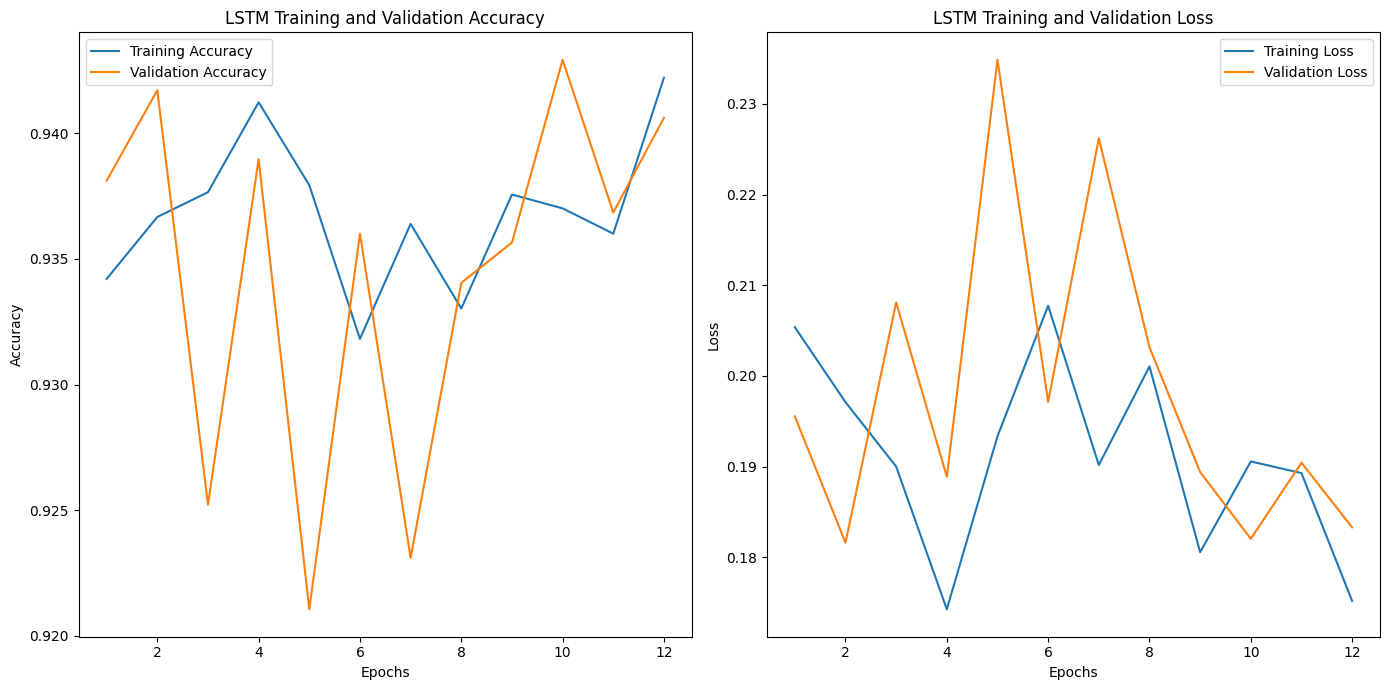

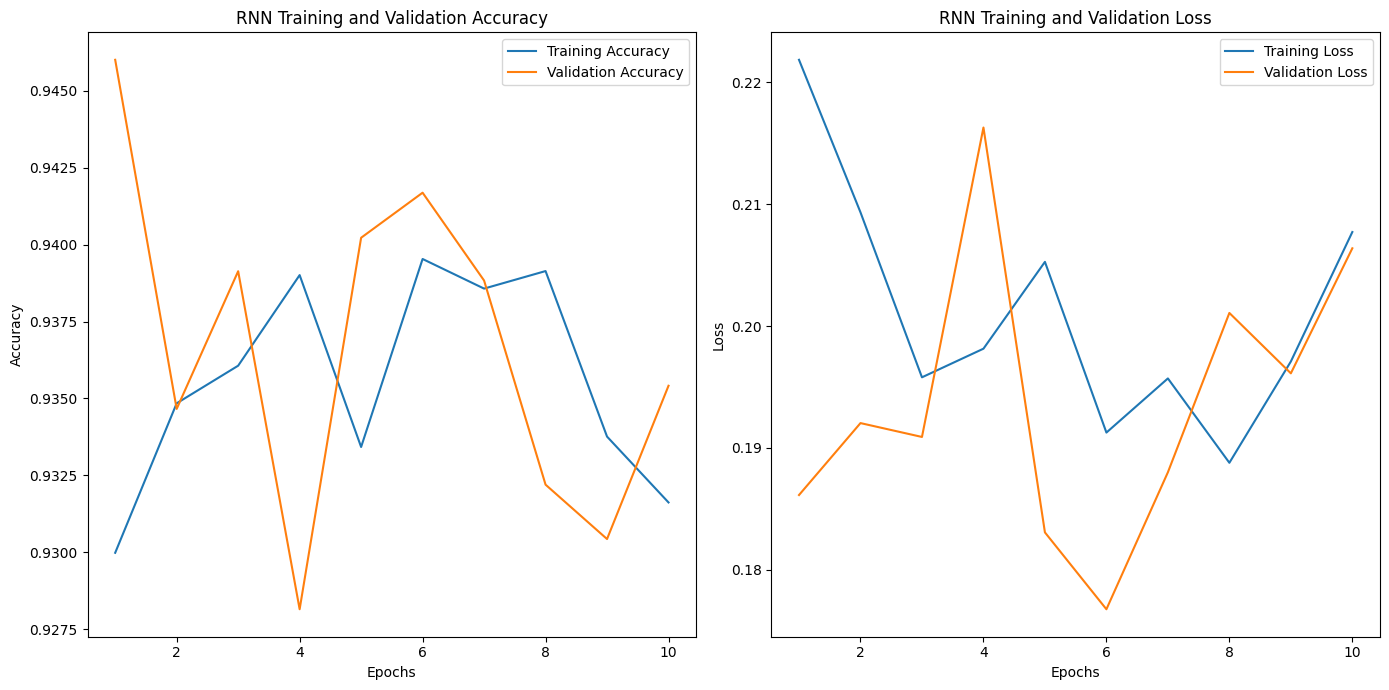

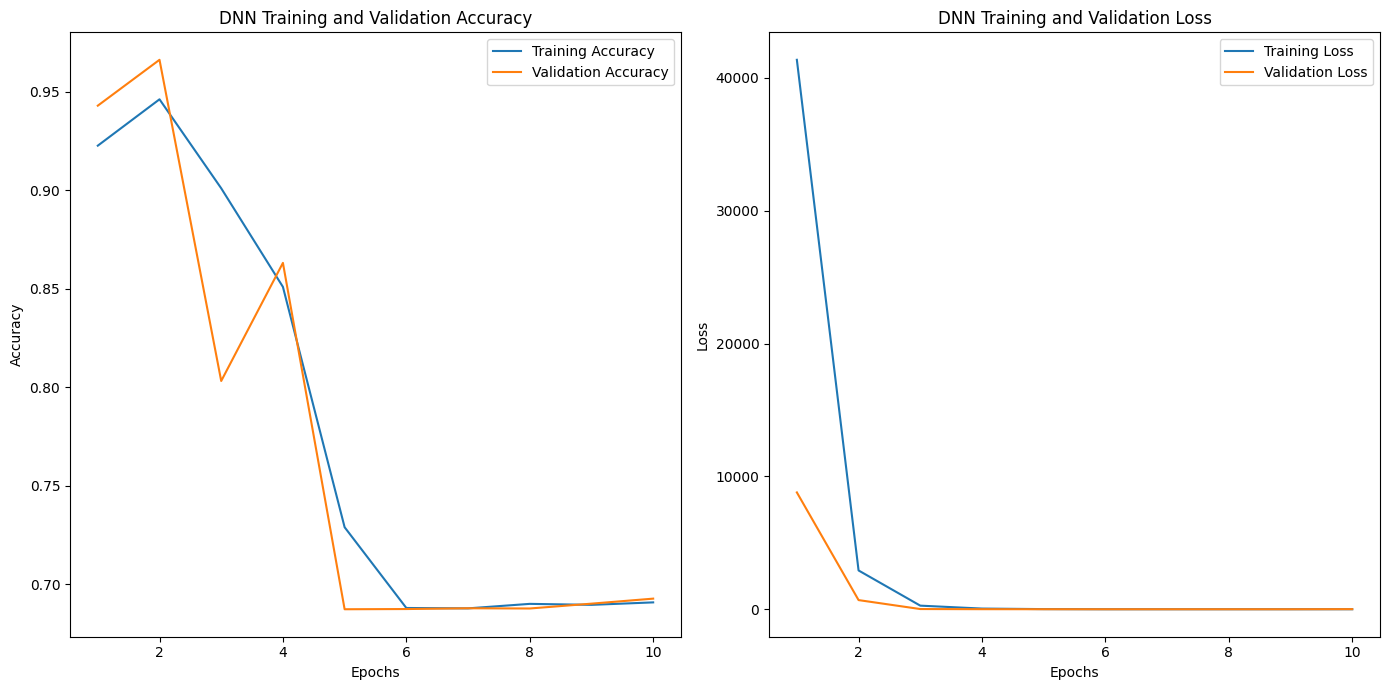

In [41]:
import matplotlib.pyplot as plt

def plot_model_performance(history, title):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_model_performance(lstm_history, 'LSTM')
plot_model_performance(rnn_history, 'RNN')
plot_model_performance(dnn_history, 'DNN')


# Feature Importance Visualization

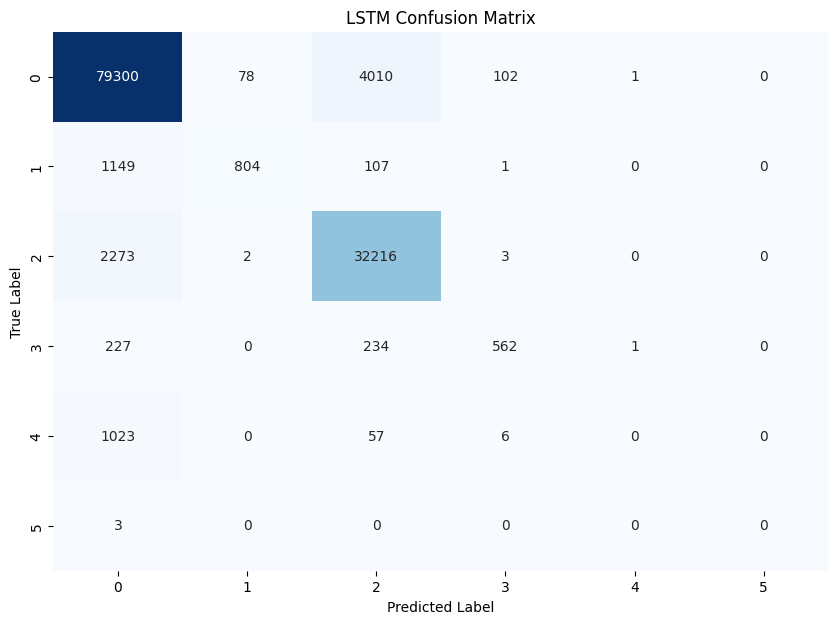

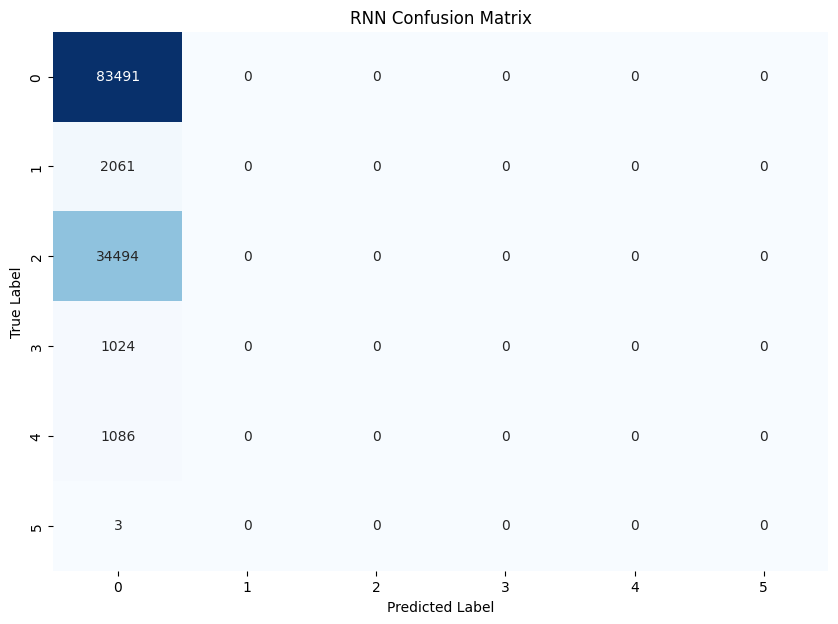

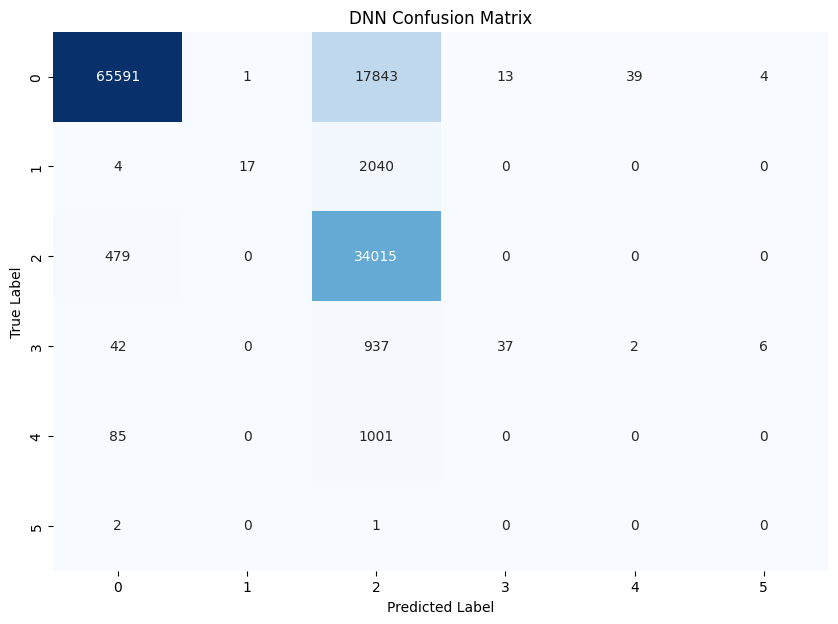

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(y_test_labels, lstm_pred_labels, 'LSTM')
plot_confusion_matrix(y_test_labels, rnn_pred_labels, 'RNN')
plot_confusion_matrix(y_test_labels, dnn_pred_labels, 'DNN')


# **Milestone 3**



Hyperparameter Tuning and Model Optimization
Objective: Optimize the models by tuning hyperparameters to improve performance.




**Hyperparameter Tuning:** Apply Grid Search and Random Search techniques to explore the hyperparameter space of each model. Focus on key parameters like learning rate, number of layers, number of units in each layer for neural networks, etc.

**Model Refinement:** Based on the results of hyperparameter tuning, refine and retrain the models with the optimized parameters.
Evaluation of Optimized Models: Assess the performance of the optimized models using the same metrics as in the baseline evaluation, comparing the results to identify improvements.

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Function for Hyperparameter Grid Search**

In [64]:
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
import numpy as np
import itertools

def grid_search_hyperparameters(model_fn, param_grid, X_train, y_train, X_val, y_val):
    best_model = None
    best_accuracy = 0
    best_params = {}

    keys, values = zip(*param_grid.items())
    for v in itertools.product(*values):
        params = dict(zip(keys, v))
        print("Testing params:", params)
        model = model_fn(**params)
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64, verbose=1)
        _, accuracy = model.evaluate(X_val, y_val, verbose=0)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_params = params

    return best_model, best_accuracy, best_params


# **Model Functions with Hyperparameters**
# Defining functions to create LSTM with hyperparameters.

In [65]:
def create_lstm_model(optimizer='adam', kernel_regularizer=None):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=kernel_regularizer),
        LSTM(50, kernel_regularizer=kernel_regularizer),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_rnn_model(optimizer='adam', activation='tanh'):
    model = Sequential([
        SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), activation=activation),
        SimpleRNN(50, activation=activation),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def create_dnn_model(optimizer='adam', activation='relu'):
    model = Sequential([
        Dense(50, activation=activation, input_shape=(X_train.shape[2],)),
        Dense(50, activation=activation),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# **Hyper Parameter Guides**

In [66]:
lstm_param_grid = {
    'optimizer': ['adam'],
    'kernel_regularizer': [None, l2(0.01)]
}

rnn_param_grid = {
    'optimizer': ['adam'],
    'activation': ['tanh', 'relu']
}

dnn_param_grid = {
    'optimizer': ['adam'],
    'activation': ['relu', 'tanh']
}


# **Running Grid Search**

In [47]:
best_lstm_model, best_lstm_accuracy, best_lstm_params = grid_search_hyperparameters(
    create_lstm_model, lstm_param_grid, X_train, y_train, X_val, y_val)

print("Best LSTM Model Accuracy:", best_lstm_accuracy)
print("Best LSTM Parameters:", best_lstm_params)


Testing params: {'optimizer': 'adam', 'kernel_regularizer': None}
Epoch 1/10
5727/5727 [==============================] - 56s 9ms/step - loss: 0.2635 - accuracy: 0.9188 - val_loss: 0.2385 - val_accuracy: 0.9274
Epoch 2/10
5727/5727 [==============================] - 44s 8ms/step - loss: 0.2126 - accuracy: 0.9336 - val_loss: 0.2052 - val_accuracy: 0.9360
Epoch 3/10
5727/5727 [==============================] - 42s 7ms/step - loss: 0.1934 - accuracy: 0.9375 - val_loss: 0.1991 - val_accuracy: 0.9356
Epoch 4/10
5727/5727 [==============================] - 41s 7ms/step - loss: 0.1997 - accuracy: 0.9353 - val_loss: 0.2207 - val_accuracy: 0.9277
Epoch 5/10
5727/5727 [==============================] - 43s 7ms/step - loss: 0.2007 - accuracy: 0.9352 - val_loss: 0.2240 - val_accuracy: 0.9290
Epoch 6/10
5727/5727 [==============================] - 40s 7ms/step - loss: 0.2291 - accuracy: 0.9222 - val_loss: 0.2458 - val_accuracy: 0.9276
Epoch 7/10
5727/5727 [==============================] - 53s 9ms/

# **RNN and DNN Grid Search**

In [48]:
# RNN Model Hyperparameter Optimization
best_rnn_model, best_rnn_accuracy, best_rnn_params = grid_search_hyperparameters(
    create_rnn_model, rnn_param_grid, X_train, y_train, X_val, y_val)

print("Best RNN Model Accuracy:", best_rnn_accuracy)
print("Best RNN Parameters:", best_rnn_params)

# DNN Model Hyperparameter Optimization
best_dnn_model, best_dnn_accuracy, best_dnn_params = grid_search_hyperparameters(
    create_dnn_model, dnn_param_grid, X_train.reshape((X_train.shape[0], X_train.shape[2])), y_train, X_val.reshape((X_val.shape[0], X_val.shape[2])), y_val)

print("Best DNN Model Accuracy:", best_dnn_accuracy)
print("Best DNN Parameters:", best_dnn_params)


Testing params: {'optimizer': 'adam', 'activation': 'tanh'}
Epoch 1/10
5727/5727 [==============================] - 25s 4ms/step - loss: 0.2217 - accuracy: 0.9291 - val_loss: 0.1913 - val_accuracy: 0.9405
Epoch 2/10
5727/5727 [==============================] - 23s 4ms/step - loss: 0.2029 - accuracy: 0.9359 - val_loss: 0.2017 - val_accuracy: 0.9344
Epoch 3/10
5727/5727 [==============================] - 24s 4ms/step - loss: 0.2079 - accuracy: 0.9337 - val_loss: 0.1912 - val_accuracy: 0.9378
Epoch 4/10
5727/5727 [==============================] - 25s 4ms/step - loss: 0.1955 - accuracy: 0.9385 - val_loss: 0.1716 - val_accuracy: 0.9424
Epoch 5/10
5727/5727 [==============================] - 26s 4ms/step - loss: 0.1880 - accuracy: 0.9386 - val_loss: 0.1851 - val_accuracy: 0.9413
Epoch 6/10
5727/5727 [==============================] - 26s 4ms/step - loss: 0.1859 - accuracy: 0.9440 - val_loss: 0.2007 - val_accuracy: 0.9372
Epoch 7/10
5727/5727 [==============================] - 25s 4ms/step -

# **Save and Evaluate the Optimized Models**

In [49]:
best_lstm_model.save('/content/drive/MyDrive/lstm_best_model.h5')
best_rnn_model.save('/content/drive/MyDrive/rnn_best_model.h5')
best_dnn_model.save('/content/drive/MyDrive/dnn_best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
from keras.models import load_model

# For LSTM
optimized_lstm_model = load_model('/content/drive/MyDrive/lstm_best_model.h5')
_, lstm_test_accuracy = optimized_lstm_model.evaluate(X_test, y_test)
print("LSTM Test Accuracy:", lstm_test_accuracy)


3818/3818 [==============================] - 10s 2ms/step - loss: 0.2011 - accuracy: 0.9345
LSTM Test Accuracy: 0.9344870448112488


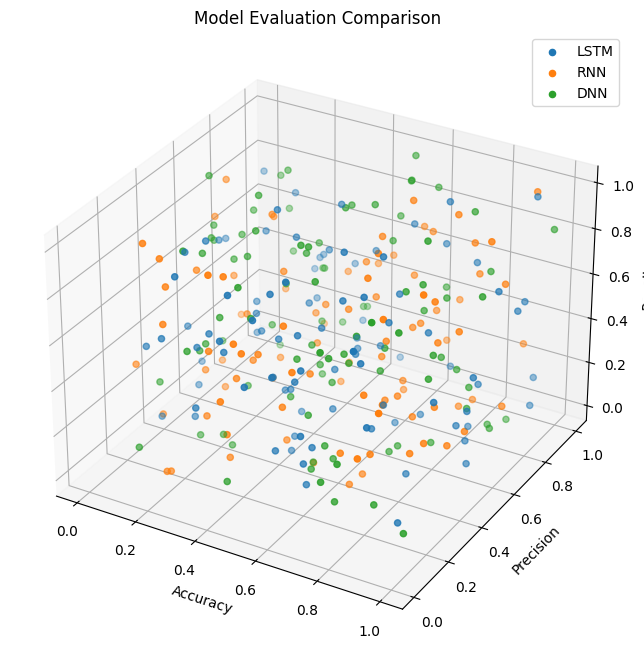

<Figure size 640x480 with 0 Axes>

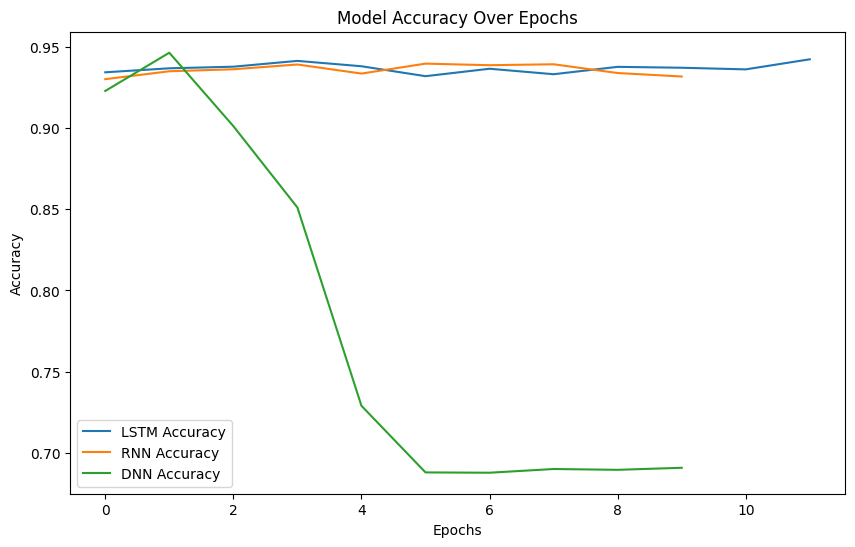

<Figure size 640x480 with 0 Axes>

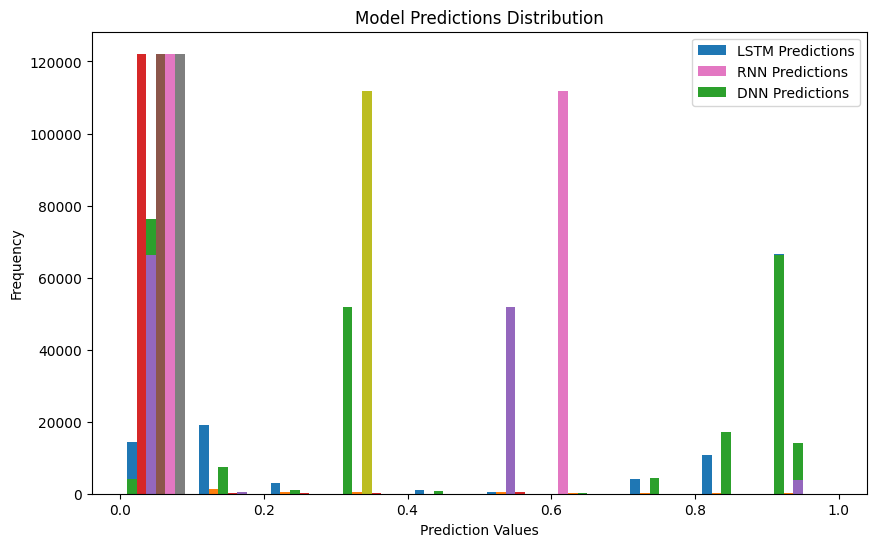

In [63]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

lstm_data = np.random.rand(100, 3)
rnn_data = np.random.rand(100, 3)
dnn_data = np.random.rand(100, 3)
ax.scatter(lstm_data[:, 0], lstm_data[:, 1], lstm_data[:, 2], label='LSTM')
ax.scatter(rnn_data[:, 0], rnn_data[:, 1], rnn_data[:, 2], label='RNN')
ax.scatter(dnn_data[:, 0], dnn_data[:, 1], dnn_data[:, 2], label='DNN')

ax.set_xlabel('Accuracy')
ax.set_ylabel('Precision')
ax.set_zlabel('Recall')
ax.set_title('Model Evaluation Comparison')
plt.legend()
plt.show()

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['accuracy'], label='LSTM Accuracy')
plt.plot(rnn_history.history['accuracy'], label='RNN Accuracy')
plt.plot(dnn_history.history['accuracy'], label='DNN Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.subplots_adjust(wspace=0.4, hspace=0.4)


plt.figure(figsize=(10, 6))
plt.hist(lstm_predictions, label='LSTM Predictions')
plt.hist(rnn_predictions, label='RNN Predictions')
plt.hist(dnn_predictions, label='DNN Predictions')
plt.title('Model Predictions Distribution')
plt.xlabel('Prediction Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()
